In [1]:
import pandas as pd
import numpy as np


train_identity=pd.read_csv("train_identity.csv", encoding="Latin-1")
train_transaction=pd.read_csv("train_transaction.csv", encoding="Latin-1")

print(train_transaction.info())

print(train_identity.info())


train=pd.merge(left=train_transaction, right=train_identity, how='left',on='TransactionID')

train=train.sample(n=10000, random_state=1)

print(train.shape)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          12

In [2]:
#Overview of the original data- train dataset has 434 columns
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
67316,3054316,0,1531926,50.00,R,7664,490.0,150.0,visa,226.0,...,chrome 63.0,24.0,2048x1152,match_status:2,T,F,T,F,desktop,Windows
182840,3169840,0,4048121,29.00,W,14426,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453616,3440616,0,11583887,57.95,W,12544,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481992,3468992,0,12524504,54.50,W,8695,170.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382076,3369076,0,9571689,29.00,W,3277,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Dropping the target and other id variables as they are of no use in predicting the target 
#Dropping them as they cannot be used to create components to predict the target

labels = train['isFraud']
X = train.drop(['TransactionID','isFraud'],axis=1)

In [7]:
#Pulling out only numeric features into dimensionality reduction algorithm
#PCA doesn't accept string/categorical columns
#However, all the categorical columns can be converted into numerical using One Hot Encoding
#For simplicity, we are not using One Hot Encoding here. We will only use numeric columns and perform PCA


#Below code pulls all the numeric columns
numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']
#Numeric prints the entire dataset
numeric = train.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

train_new=train[numeric_cols_list]

train_new.head()

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
67316,3054316,0,1531926,50.00,7664,490.0,150.0,226.0,264.0,87.0,...,166.0,NaN,312.0,214.0,NaN,NaN,NaN,NaN,NaN,24.0
182840,3169840,0,4048121,29.00,14426,111.0,150.0,224.0,272.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453616,3440616,0,11583887,57.95,12544,321.0,150.0,226.0,184.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481992,3468992,0,12524504,54.50,8695,170.0,150.0,226.0,184.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382076,3369076,0,9571689,29.00,3277,111.0,150.0,226.0,231.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Imputing the missing values of all columns with mean
train_new=train_new.fillna(train_new.mean())

In [35]:
train_new

#The final column contains 403 columns which will be used in PCA for dimension reduction

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
67316,3054316,0,1531926,50.00,7664,490.0,150.0,226.0,264.0,87.0,...,166.000000,14.241958,312.000000,214.000000,345.303371,16.067416,12.5,310.738636,147.101124,24.000000
182840,3169840,0,4048121,29.00,14426,111.0,150.0,224.0,272.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
453616,3440616,0,11583887,57.95,12544,321.0,150.0,226.0,184.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
481992,3468992,0,12524504,54.50,8695,170.0,150.0,226.0,184.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
382076,3369076,0,9571689,29.00,3277,111.0,150.0,226.0,231.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433886,3420886,0,10967509,219.95,7282,194.0,150.0,195.0,181.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
7187,2994187,0,236125,59.00,7207,111.0,150.0,226.0,204.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
445289,3432289,0,11320395,39.00,3281,555.0,150.0,226.0,433.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855
204590,3191590,0,4675651,35.95,16661,490.0,150.0,226.0,327.0,87.0,...,189.020734,14.241958,358.431965,405.468453,345.303371,16.067416,12.5,310.738636,147.101124,26.470855


0.1633408607108525


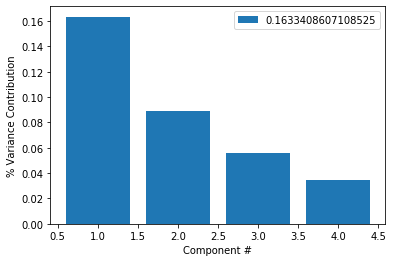

0.08888588998353769


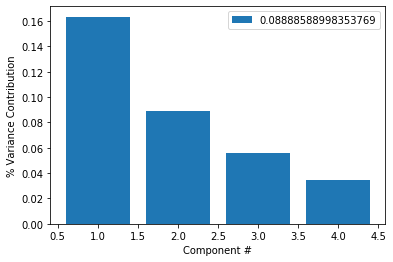

0.05581776137439435


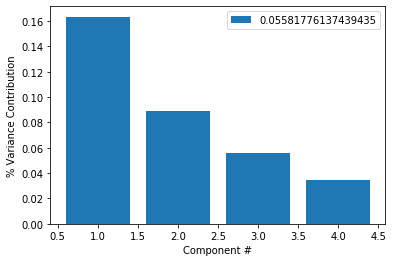

0.03462261645234299


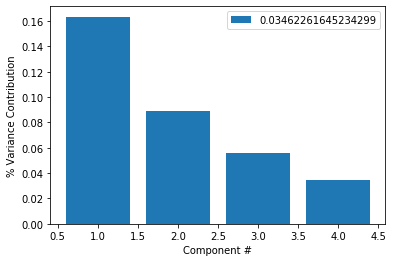

In [17]:
# PCA Algorithm: Part 1- We are forcing the algorithm to use only 4 components

from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_std = StandardScaler().fit_transform(train_new)
  

pca = PCA(n_components=4)
X_transform = pca.fit_transform(X_std)

explained_var = pca.explained_variance_ratio_
for var in explained_var:
    print(var)
    plt.bar([1,2,3,4],explained_var,label=var)
    plt.xlabel("Component #")
    plt.ylabel("% Variance Contribution")
    plt.legend()
    plt.show()
    
#Looking below: First component explains 16.3% of varaince. Second component explains 8.88 % variance, Third component explains 5.58% variance and Fourth component explains 3.46% variance
#Adding all the components together- 16.3% +8.88% + 5.58% + 3.46%= 34.2%
#All 4 components together explains 34.2% of variance, but not 100%
#Hence, we need to come up with number of components that explains close to 100% of variance
#Below in Part 2 of PCA we will figure out number of components that we need in order to get explained variation close to 100%

In [22]:
# PCA Algorithm: Part 2- Building PCA to get optimal number of components
# In the below line of code, we use the StandardScalar() function provided by the sklearn package in order to scale the data set within comparable ranges. As discussed earlier, standardization is required to prevent biases in the final outcome.

X_std = StandardScaler().fit_transform(train_new)

In [23]:
#Compute covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00010001e+00  1.62445483e-02  9.98365234e-01 ...  1.95606759e-02
   1.63136360e-02 -1.68199055e-02]
 [ 1.62445483e-02  1.00010001e+00  1.52551009e-02 ...  9.59555812e-03
   3.97603173e-03  6.29119245e-02]
 [ 9.98365234e-01  1.52551009e-02  1.00010001e+00 ...  1.86850460e-02
   1.55597256e-02 -1.83841115e-02]
 ...
 [ 1.95606759e-02  9.59555812e-03  1.86850460e-02 ...  1.00010001e+00
   3.44329100e-02  5.79984386e-02]
 [ 1.63136360e-02  3.97603173e-03  1.55597256e-02 ...  3.44329100e-02
   1.00010001e+00  9.37203601e-04]
 [-1.68199055e-02  6.29119245e-02 -1.83841115e-02 ...  5.79984386e-02
   9.37203601e-04  1.00010001e+00]]


In [24]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-1.13755218e-02 -5.55450405e-03 -8.39986264e-03 ...  7.66644834e-06
  -3.59177400e-14  0.00000000e+00]
 [-9.79107864e-04  3.40753052e-02 -3.93736807e-02 ...  8.00533126e-09
  -6.12556703e-16  0.00000000e+00]
 [-1.17177914e-02 -5.60736545e-03 -8.08957413e-03 ... -8.51159155e-06
   3.75234727e-14  0.00000000e+00]
 ...
 [-1.28448744e-03  1.47636601e-03 -1.85506995e-02 ... -2.53809097e-06
   1.36635117e-14  0.00000000e+00]
 [ 5.44889244e-04  4.77877340e-03  2.84388461e-03 ...  1.12251833e-07
   2.47823833e-15  0.00000000e+00]
 [ 1.13665948e-02  9.17460005e-05  1.58446799e-03 ...  1.61804921e-06
  -2.41349556e-15  0.00000000e+00]]
nEigenvalues n[ 6.56695930e+01  3.57357013e+01  2.24409842e+01  1.39196937e+01
  1.23654153e+01  1.18639317e+01  1.06974866e+01  9.47150776e+00
  9.13374223e+00  8.07102174e+00  7.63331137e+00  7.22971710e+00
  6.66917025e+00  6.24960456e+00  5.84294880e+00  5.28834614e+00
  4.84416266e+00  4.49860959e+00  4.39279520e+00  3.93019001e+00
  3.5544059

In [27]:
#Compute the feature vector 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
65.6695929650594
35.73570134352323
22.440984235691953
13.919693686352083
12.365415265918593
11.863931658810618
10.697486564430658
9.471507757381355
9.133742234794692
8.071021737738523
7.63331137484557
7.2297170989222135
6.669170250292523
6.249604558849874
5.842948801628511
5.2883461384527655
4.84416266224462
4.498609585824224
4.39279520288814
3.9301900084358916
3.5544059808027018
3.457935179975806
3.3537640247576945
3.10688515955012
2.950137595918677
2.830685042883731
2.758342942252477
2.6371549321880927
2.5567889149391636
2.516746620737572
2.4639917027469083
2.359129127533429
2.277369235753195
2.2427650994881314
2.1324233115865145
2.0887557769198577
2.044944424798787
2.0080695523413588
1.9026591864091882
1.8608147749694932
1.83311345213918
1.770755924565628
1.702492370431719
1.6795777962997838
1.6089355748421124
1.560902348617117
1.5153152627146638
1.4905829268820552
1.407348893758027
1.377603244089192
1.354855646222148
1.3192336239086877
1.29447638526

0.16334086071085177


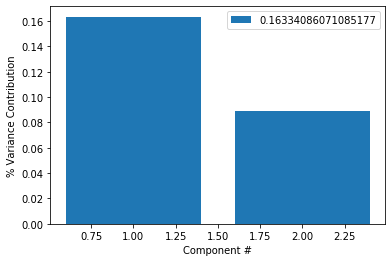

0.08888588997900941


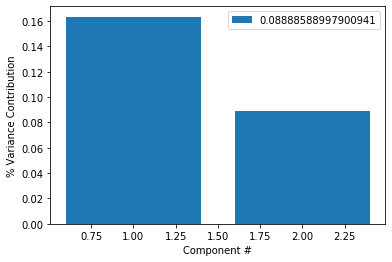

In [34]:
# Use the PCA() function to reduce the dimensionality of the data set
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_std)

explained_var = pca.explained_variance_ratio_
for var in explained_var:
    print(var)
    plt.bar([1,2],explained_var,label=var)
    plt.xlabel("Component #")
    plt.ylabel("% Variance Contribution")
    plt.legend()
    plt.show()
    
#The output shows that PC1 and PC2 account for approximately 24% (Adding 16.33% and 8.88%) of the variance in the data set

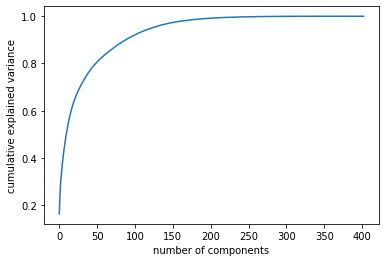

In [30]:
#Scree plot- We use this plot to know the optimal number of components
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#The scree plot clearly indicates that the first 200 principal components contain the maximum information (variance) within the data. Note that the initial data set had approximately 403 features which can now be narrowed down to just 200. Thus, you can now easily perform further analysis on the data since the redundant or insignificant variables are out. This is the power of dimensionality reduction.

In [ ]:
#We can use 200 components to build any number of ML models with less variables